<a href="https://colab.research.google.com/github/HyunJin0505/fastai_pa/blob/main/fast_pa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 8.5MB/s 
     |████████████████████████████████| 51kB 5.3MB/s 
     |████████████████████████████████| 1.2MB 12.4MB/s 
     |████████████████████████████████| 194kB 29.1MB/s 
     |████████████████████████████████| 61kB 7.1MB/s 
Mounted at /content/gdrive


In [2]:
from fastbook import *
from fastai.vision.widgets import *

In [3]:
from fastai.vision.all import *

In [4]:
key =os.environ.get('AZURE_SEARCH_KEY','2d1fd82efb8f4437b80b7ceddaed1db1')

In [5]:
search_images_bing

<function fastbook.search_images_bing>

In [6]:
results = search_images_bing(key, 'Nike')
ims = results.attrgot('content_url')
len(ims)

150

In [7]:
ims = ['https://ifh.cc/g/tX7mKk.jpg']

In [8]:
dest ='images/sample.jpg'
os.mkdir('images')         
download_url(ims[0],dest)

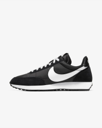

In [9]:
im = Image.open(dest)
im.to_thumb(128,128)

In [10]:
brand_types='nike','adidas','reebok'
path=Path('brands')

if not path.exists():
    path.mkdir()
    for o in brand_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_bing(key, f'{o} brand')
        download_images(dest, urls=results.attrgot('contentUrl'))

In [11]:
print(os.getcwd())

/content


In [12]:
fns = get_image_files(path)
fns

(#394) [Path('brands/nike/00000132.jpg'),Path('brands/nike/00000033.jpg'),Path('brands/nike/00000105.jpg'),Path('brands/nike/00000050.png'),Path('brands/nike/00000067.jpg'),Path('brands/nike/00000142.jpg'),Path('brands/nike/00000071.jpg'),Path('brands/nike/00000144.jpg'),Path('brands/nike/00000084.jpeg'),Path('brands/nike/00000120.png')...]

In [13]:
failed = verify_images(fns)
failed

(#13) [Path('brands/adidas/00000108.jpg'),Path('brands/adidas/00000084.jpg'),Path('brands/adidas/00000031.jpg'),Path('brands/adidas/00000007.jpg'),Path('brands/adidas/00000146.jpg'),Path('brands/adidas/00000049.jpg'),Path('brands/adidas/00000030.jpg'),Path('brands/adidas/00000058.jpg'),Path('brands/adidas/00000038.jpg'),Path('brands/adidas/00000098.jpg')...]

In [14]:
failed.map(Path.unlink);

From data to Dataloader

In [15]:
brands = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [16]:
dls=brands.dataloaders(path)

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


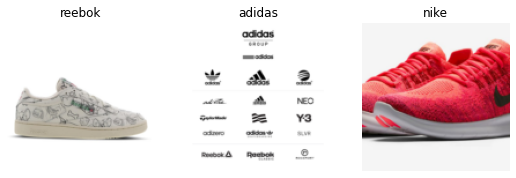

In [17]:
dls.valid.show_batch(max_n=3, nrows=1)

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


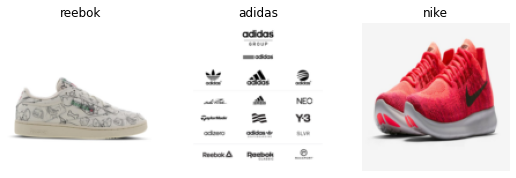

In [18]:
brands = brands.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls=brands.dataloaders(path)
dls.valid.show_batch(max_n=3,nrows=1)

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


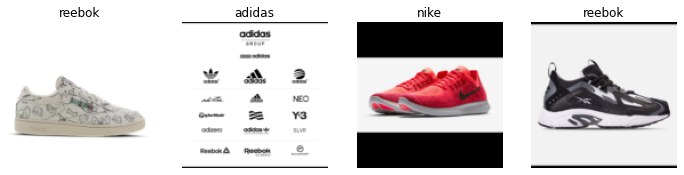

In [19]:
brands = brands.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = brands.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

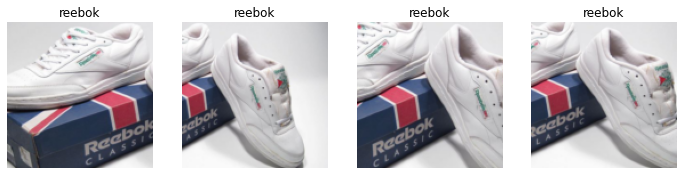

In [20]:
brands = brands.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = brands.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

### Data Augmentation

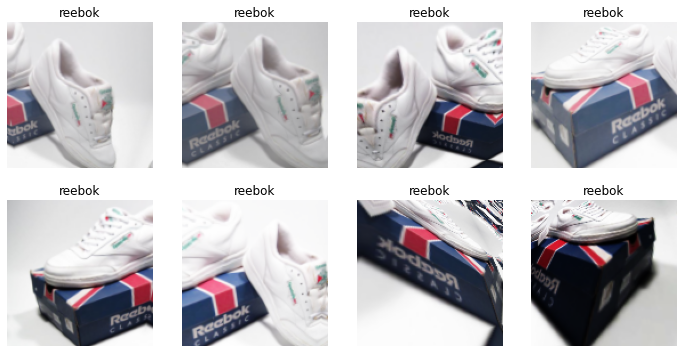

In [21]:
brands = brands.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls=brands.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

### Training Your Model, and Using It to Clean Your Data

In [22]:
brands = brands.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = brands.dataloaders(path)

In [41]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(20)

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency e

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


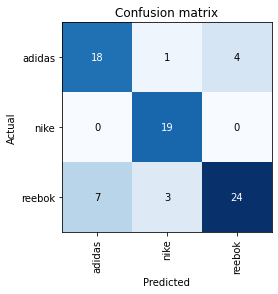

In [42]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

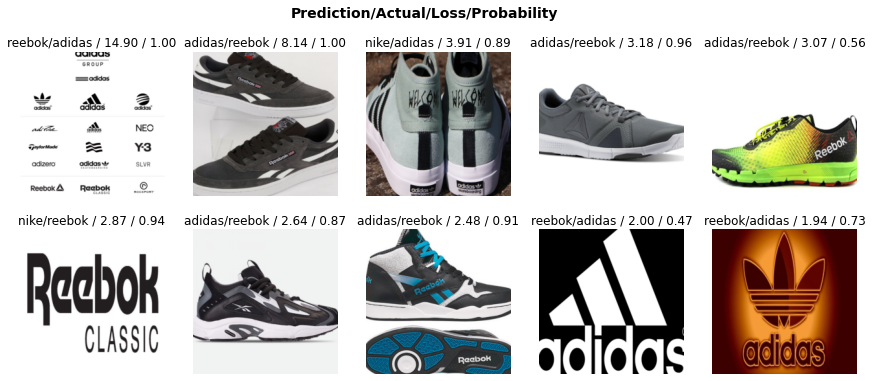

In [43]:
interp.plot_top_losses(10, nrows=2)

In [47]:
cleaner = ImageClassifierCleaner(learn)
cleaner

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [48]:
 #hide
 for idx in cleaner.delete(): cleaner.fns[idx].unlink()
 for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

### Turning Your Model into an Online Application

In [49]:
learn.export()

In [50]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [51]:
learn_inf = load_learner(path/'export.pkl')

In [52]:
learn_inf.dls.vocab

['adidas', 'nike', 'reebok']